# Compare designs

In [1]:
# Reload Process each time (keep editable install up-to-date)
%load_ext autoreload
%autoreload 2

from process.io.plot_solutions import RunMetadata, plot_mfile_solutions
from pathlib import Path
from matplotlib import pyplot as plt

,tag,objf_name,norm_objf,itvar001_name,xcm001,itvar002_name,xcm002,itvar003_name,xcm003,itvar004_name,...,itvar017_name,xcm017,itvar018_name,xcm018,itvar019_name,xcm019,itvar020_name,xcm020,itvar021_name,xcm021
0,$\min R_{major}$,major radius,1.600000,bt,0.881917,rmajor,1.000000,te,1.085222,beta,...,cpttf,1.206761,ralpne,0.955438,oh_steel_frac,0.639405,fimp(13),1.780231,dr_tf_wp,1.033958
1,$\max Q$,fusion gain,-39.542761,bt,0.903219,rmajor,1.062392,te,1.265500,beta,...,cpttf,1.168697,ralpne,1.013127,oh_steel_frac,0.925638,fimp(13),2.458224,dr_tf_wp,1.325070


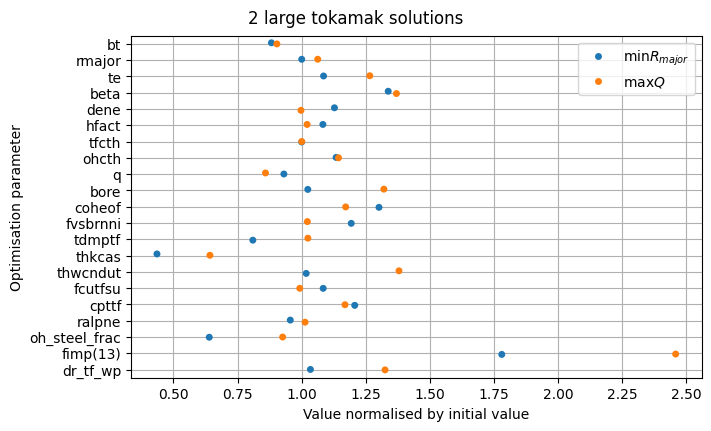

In [2]:
data_dir = Path.cwd()
runs_metadata = [
    RunMetadata(data_dir / "lt_MFILE.DAT", "$\min R_{major}$"),
    RunMetadata(data_dir / "lt_max_q_MFILE.DAT", "$\max Q$"),
]

fig, df = plot_mfile_solutions(
    runs_metadata=runs_metadata,
    plot_title="2 large tokamak solutions",
    plot_obj_func=False,
)
df

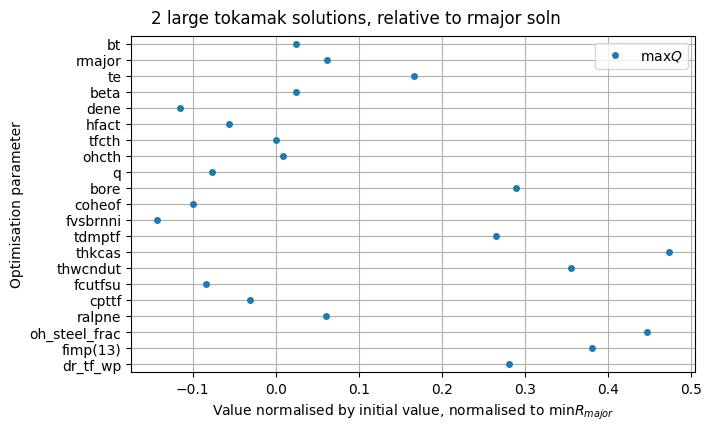

In [3]:
fig, df = plot_mfile_solutions(
    runs_metadata=runs_metadata,
    plot_title="2 large tokamak solutions, relative to rmajor soln",
    normalising_tag="$\min R_{major}$",
    plot_obj_func=False,
)

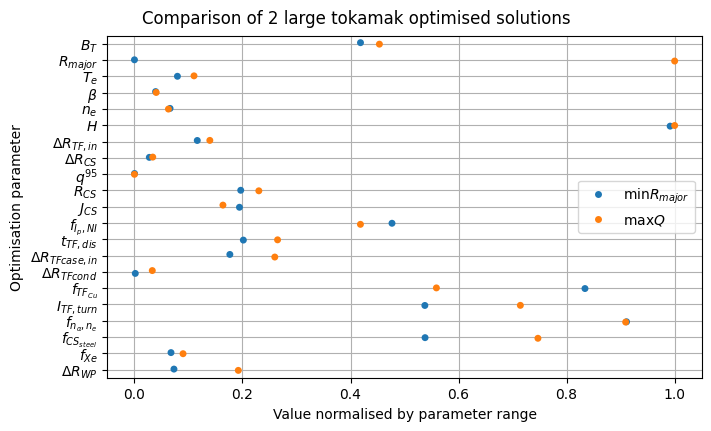

In [16]:
fig, df = plot_mfile_solutions(
    runs_metadata=runs_metadata,
    plot_title="Comparison of 2 large tokamak optimised solutions",
    normalisation_type="range",
    plot_obj_func=False,
)

opt_param_desc = {
    "beta": [r"$\beta$", "Plasma beta"],
    "bore": ["$R_{CS}$", "Central solenoid inboard radius (m)"],
    "bt": ["$B_T$", "Toroidal field on axis (T)"],
    "coheof": [
        "$J_{CS}$",
        "Central solenoid overall current density at end of flat-top (A/m2)",
    ],
    "cpttf": ["$I_{TF, turn}$", "TF coil current per turn (A)"],
    "dene": ["$n_e$", "Electron density (/m3)"],
    "dr_tf_wp": ["$\Delta R_{WP}$", "Radial thickness of winding pack (m)"],
    "fcohbop": [
        "$f_{J_{CS}}$",
        "Ratio of central solenoid overall current density at beginning of pulse / end of flat-top",
    ],
    "fcutfsu": ["$f_{TF_{Cu}}$", "Copper fraction of cable conductor (TF coils)"],
    "fimp(13)": ["$f_{Xe}$", "Xenon density fraction relative to electron density"],
    "fvsbrnni": [
        "$f_{I_p, NI}$",
        "Fraction of the plasma current produced by non-inductive means",
    ],
    "hfact": ["$H$", "H factor on energy confinement times, radiation corrected"],
    "oh_steel_frac": ["$f_{CS_{steel}}$", "Central solenoid steel fraction"],
    "ohcth": ["$\Delta R_{CS}$", "Central solenoid thickness (m)"],
    "q": ["$q^{95}$", "Safety factor 'near' plasma edge, equal to q95"],
    "ralpne": [r"$f_{n_{\alpha}, n_e}$", "Thermal alpha density/electron density"],
    "rmajor": ["$R_{major}$", "Plasma major radius (m)"],
    "tdmptf": [
        "$t_{TF, dis}$",
        "Fast discharge time for TF coil in event of quench (s)",
    ],
    "te": ["$T_e$", "Volume averaged electron temperature (keV)"],
    "tfcth": ["$\Delta R_{TF, in}$", "Inboard TF coil thickness (m)"],
    "thkcas": [
        "$\Delta R_{TF case, in}$",
        "Inboard TF coil case outer (non-plasma side) thickness (m)",
    ],
    "thwcndut": ["$\Delta R_{TF cond}$", "TF coil conduit case thickness (m)"],
}
# Replace var names with symbols
# TODO Sort this out: should be in plot_solutions really
yticks = fig.axes[0].get_yticks()
ylabels = [item.get_text() for item in fig.axes[0].get_yticklabels()]
new_labels = []
for label in ylabels:
    new_labels.append(opt_param_desc[label][0])

fig.axes[0].set_yticks(yticks, new_labels)


plt.savefig("solution_comparison_plot.pdf")